In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('final_cars_datasets (1).csv')
df.head()

,Unnamed: 0,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [4]:
df.drop(columns='Unnamed: 0', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            2318 non-null   int64 
 1   mark             2318 non-null   object
 2   model            2318 non-null   object
 3   year             2318 non-null   int64 
 4   mileage          2318 non-null   int64 
 5   engine_capacity  2318 non-null   int64 
 6   transmission     2318 non-null   object
 7   drive            2318 non-null   object
 8   hand_drive       2318 non-null   object
 9   fuel             2318 non-null   object
dtypes: int64(4), object(6)
memory usage: 181.2+ KB


In [19]:
df.describe()

,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000
mean,971.522433,2005.972390,100013.194996,1507.010785
std,288.673112,3.698863,52512.478883,549.585170
min,80.000000,1979.000000,2000.000000,9.000000
25%,776.000000,2004.000000,67000.000000,1300.000000
50%,1000.000000,2006.000000,94000.000000,1490.000000
75%,1213.000000,2009.000000,124000.000000,1800.000000
max,1400.000000,2015.000000,790000.000000,12340.000000


### Task 1: Trends in Car Sales and the Car Industry

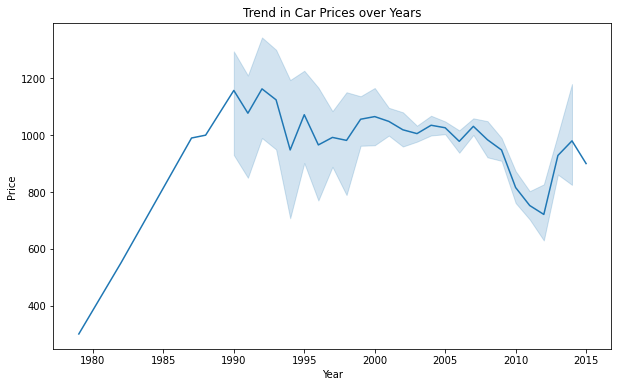

In [8]:
# Trends in car sales over the years
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='year', y='price')
plt.title('Trend in Car Prices over Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


The prices have steadily increased from 1980 to 1990. In general, we can say that the while the year increases, the price also increases with some notable decreases in some of the years. It would be interesting to find out as to why there are sudden drops in car prices in some years.

Text(0, 0.5, 'No. of cars')

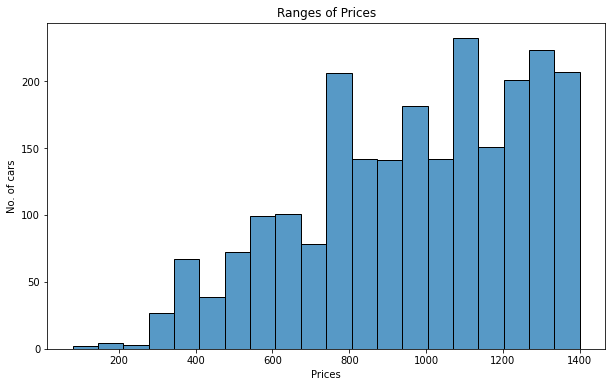

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'])
plt.title('Ranges of Prices')
plt.xlabel('Prices')
plt.ylabel('No. of cars')

In this histogram, it suggests that most of the car prices ranges from 800-1400 across the years 1979-2015

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 10 car brands on sale')

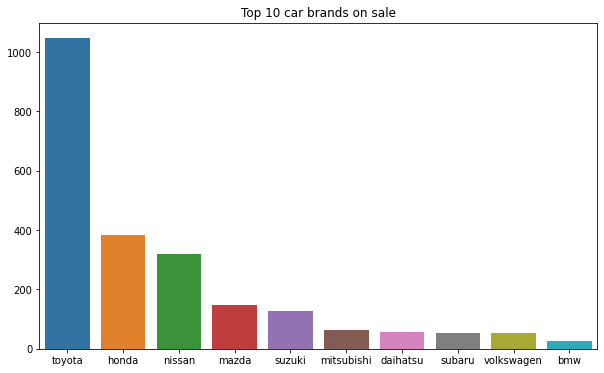

In [24]:
top_10 = df.mark.value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(top_10.index, top_10.values)
plt.title('Top 10 car brands on sale')

Out of all the different car brands, Toyota seems to be the most sold car across the different years, followed by Honda and Nissan. This would suggest that there was a preference towards Toyota cars.

Text(0.5, 1.0, 'Most preferred transmission from 1979-2015')

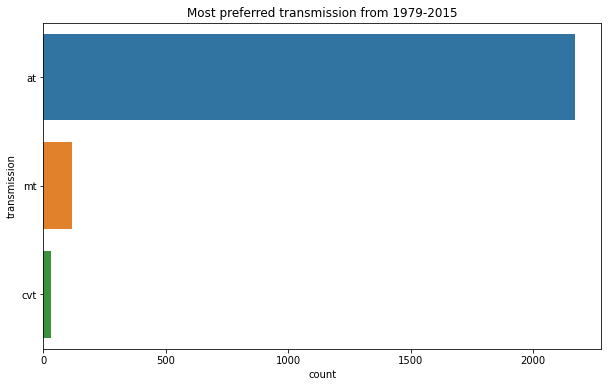

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(y='transmission', data=df, orient='h')
plt.title('Most preferred transmission from 1979-2015')


From 1979-2015, AT transmission has been dominating the car industry in terms of car sales. This of course makes sense as automatic transmissions have been a standard in cars since at least 1974

Text(0.5, 1.0, 'Most preferred fuel used over the years')

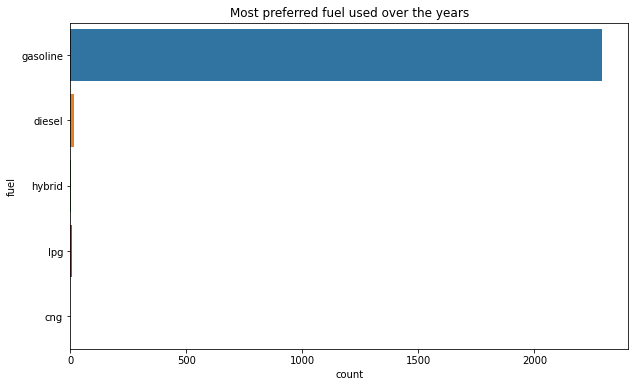

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(y='fuel', data=df, orient='h')
plt.title('Most preferred fuel used over the years')


This graph indicates that gasoline was the most popular transportation fuel being used across the years

Text(0.5, 1.0, 'Relationship of Price to Mileage')

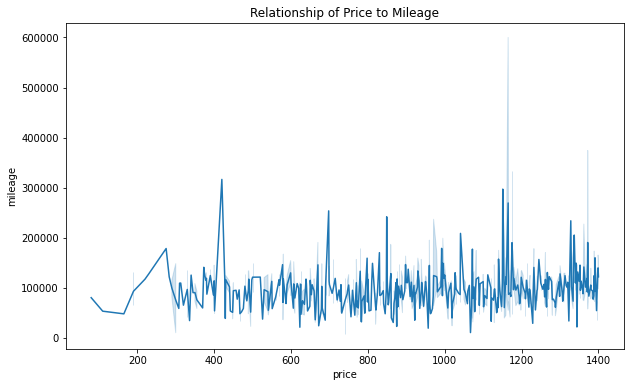

In [39]:
plt.figure(figsize=(10,6))
sns.lineplot(x='price', y='mileage', data=df)
plt.title('Relationship of Price to Mileage')

This graph shows the relationship between price and mileage, and it suggests that the price of the car varies based on the mileage and this should be a considering factor for the calculation of how much the car should be sold in the ad. 

### Task 2: Correlation between price and various features

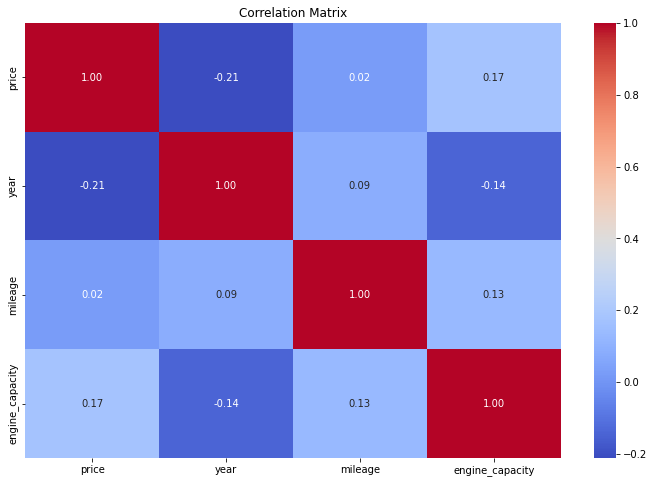

In [44]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Interestingly, price and year have a low correlation, and that the number one factor that affects the price is engine_capacity followed by mileage. Having engine_capacity as the most correlated feature to price makes sense as larger engines tends to be more expensive to build. Aside from these other features, it also worth noting that there are other factors that could affect the price such as the brand and model of the car.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Price distribution over the year with regards to Fuel type')

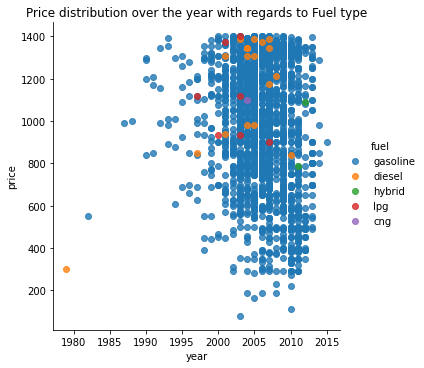

In [55]:
sns.lmplot('year','price', df, fit_reg=False, hue='fuel')
plt.title("Price distribution over the year with regards to Fuel type")

Looking at the distribution of the price over the years with regards to fuel type, it suggests that as the years increase, the prices also change (increase/decrease over the period of time). It also tells us that the changes in price of the car is heavily influenced by the gasoline fuel as compared to the other types

### Task 3: Prediction of a used car's price given its specifications

Mean Squared Error: 75432.4102341583


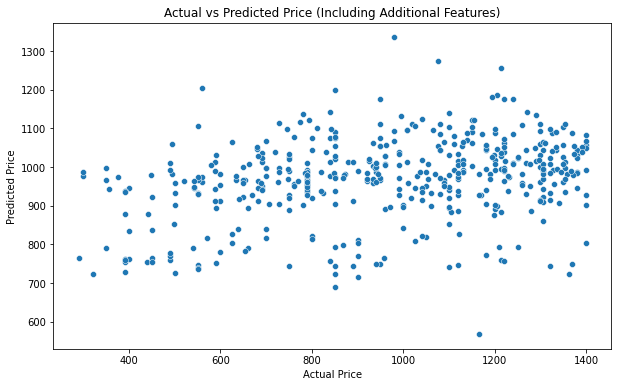

In [58]:
# Prepare data for training
X = df[['year', 'engine_capacity', 'mileage', 'transmission', 'fuel', 'drive', 'hand_drive', 'mark']]
y = df['price']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict prices for the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize predictions
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Including Additional Features)')
plt.show()


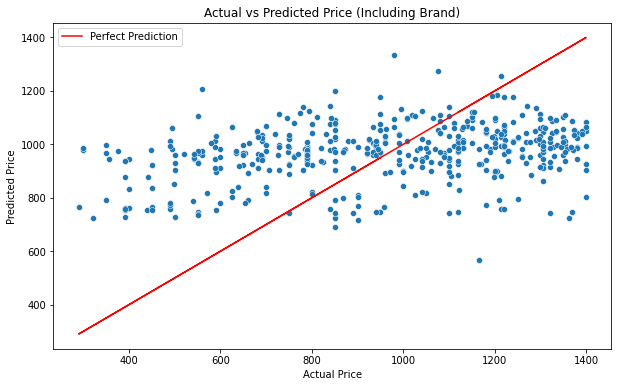

In [63]:
# Visualize predictions with linear regression line
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot(y_test, y_test, color='red', label='Perfect Prediction')  # Plot the perfect prediction line (y = x)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Including Brand)')
plt.legend()
plt.show()
